### Visualization

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading the Dataset

In [5]:
df = pd.read_csv('Final Dataset.csv')
df.head()

In [ ]:
df.shape  

(405894, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405894 entries, 0 to 405893
Data columns (total 58 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0.1                              405894 non-null  int64  
 1   time                                      405894 non-null  float64
 2   instance_events_type                      405894 non-null  int64  
 3   collection_id                             405894 non-null  int64  
 4   scheduling_class                          405894 non-null  float64
 5   collection_type                           405894 non-null  int64  
 6   priority                                  405894 non-null  float64
 7   alloc_collection_id                       405894 non-null  int64  
 8   instance_index                            405894 non-null  int64  
 9   machine_id                                405894 non-null  int64  
 10  collections_events_t

In [ ]:
df.isnull().sum()

Unnamed: 0.1                                   0
time                                           0
instance_events_type                           0
collection_id                                  0
scheduling_class                               0
collection_type                                0
priority                                       0
alloc_collection_id                            0
instance_index                                 0
machine_id                                     0
collections_events_type                        0
user                                           0
collection_name                                0
collection_logical_name                        0
vertical_scaling                               0
scheduler                                      0
start_time                                     0
end_time                                       0
assigned_memory                                0
page_cache_memory                              0
cycles_per_instructi

In [ ]:
df.duplicated().sum()

0

### Heat Map

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset into a pandas DataFrame
df = pd.read_csv('Final Dataset.csv')

# Extract numerical features
numerical_data = df.drop(columns=['collection_logical_name', 'collection_name', 'user', 'collections_events_type', 'machine_id', 
                                  'instance_index', 'alloc_collection_id', 'collection_type', 'collection_id', 'instance_events_type', 'Unnamed: 0.1'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Define a function to create smaller heatmaps
def plot_heatmap(corr_matrix, start_idx, end_idx, title):
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix.iloc[start_idx:end_idx, start_idx:end_idx], annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 8})
    plt.title(title)
    plt.show()

# Split the heatmap into two parts (adjust the indices as needed)
plot_heatmap(correlation_matrix, 0, len(correlation_matrix) // 2, 'Correlation Heatmap of Numerical Features (Part 1)')
plot_heatmap(correlation_matrix, len(correlation_matrix) // 2, len(correlation_matrix), 'Correlation Heatmap of Numerical Features (Part 2)')


![Heat Map g.png](<attachment:Heat Map g.png>) ![Heat Map h.png](<attachment:Heat Map h.png>)
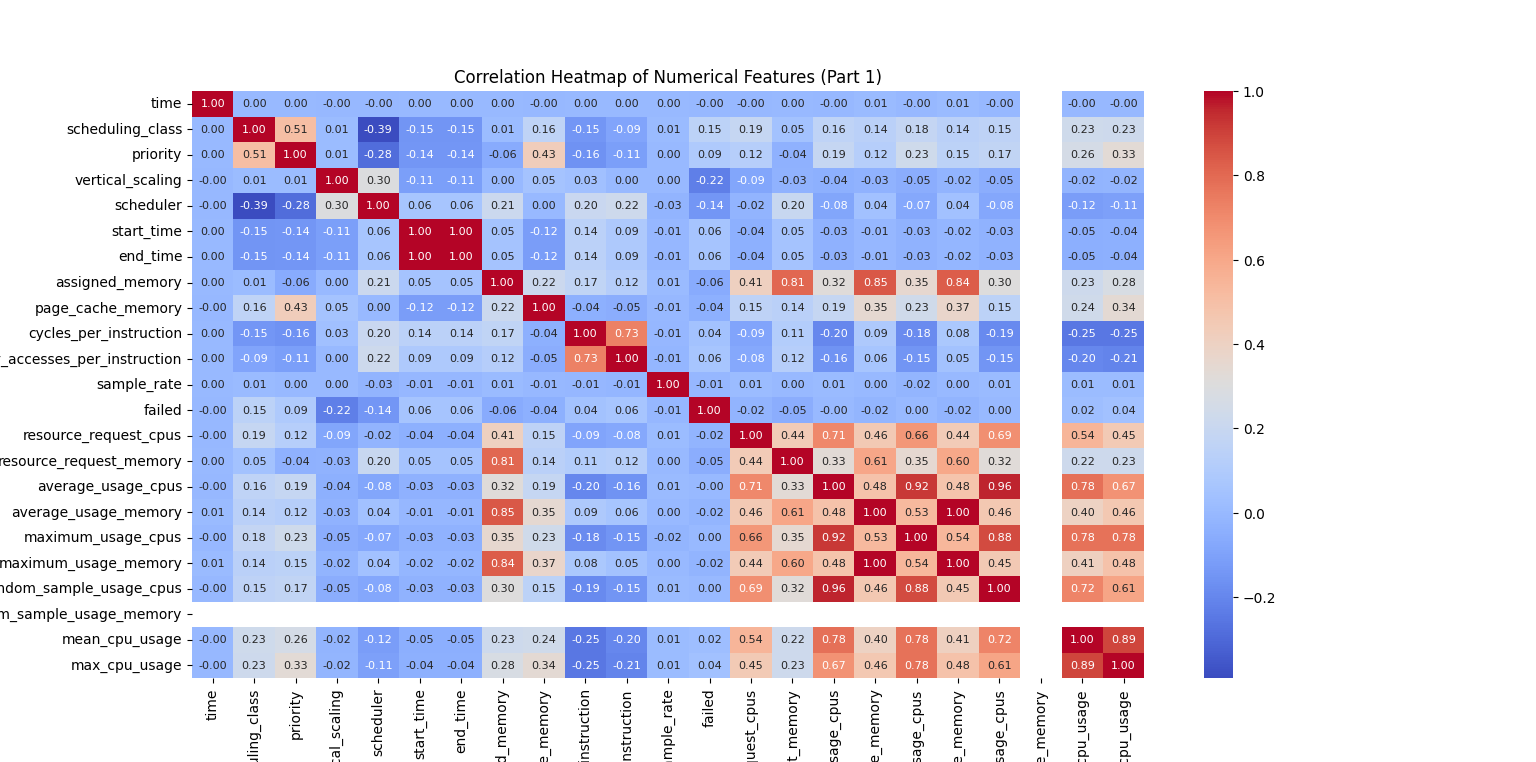
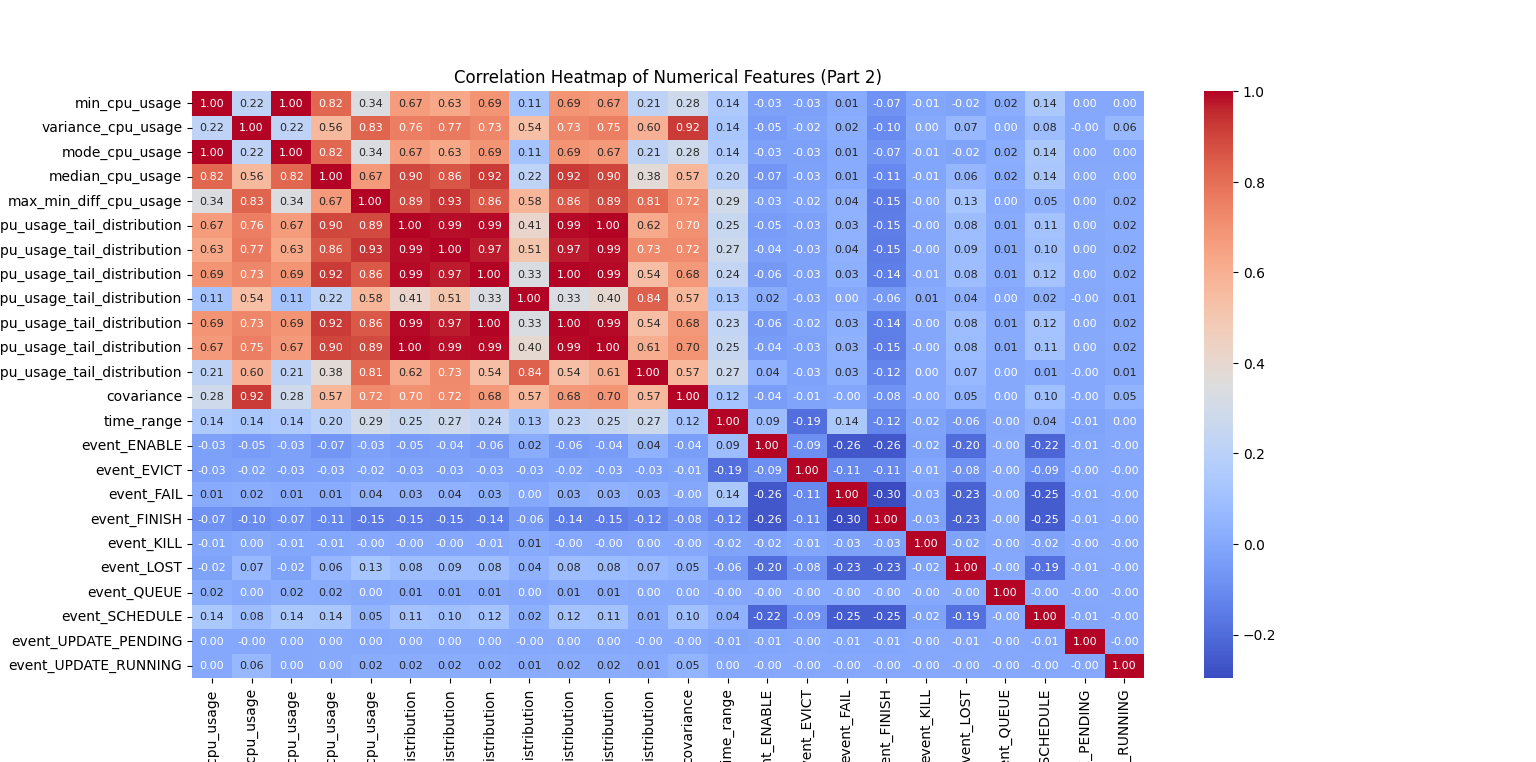

### t-SNE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load dataset into a pandas DataFrame
df = pd.read_csv('Final Dataset.csv')

# Extract numerical features
numerical_data = df.drop(columns=['collection_logical_name' , 'collection_name' , 'user' , 'collections_events_type' , 'machine_id' , 
                                  'instance_index' , 'alloc_collection_id' , 'collection_type' , 'collection_id' , 'instance_events_type' , 'Unnamed: 0.1'])

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Create an imputer object (e.g., using mean imputation)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the numerical data
imputed_data = imputer.fit_transform(numerical_data)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(imputed_data)

# Plot the t-SNE results directly from the tsne_results array
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])  # Access the columns directly
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()




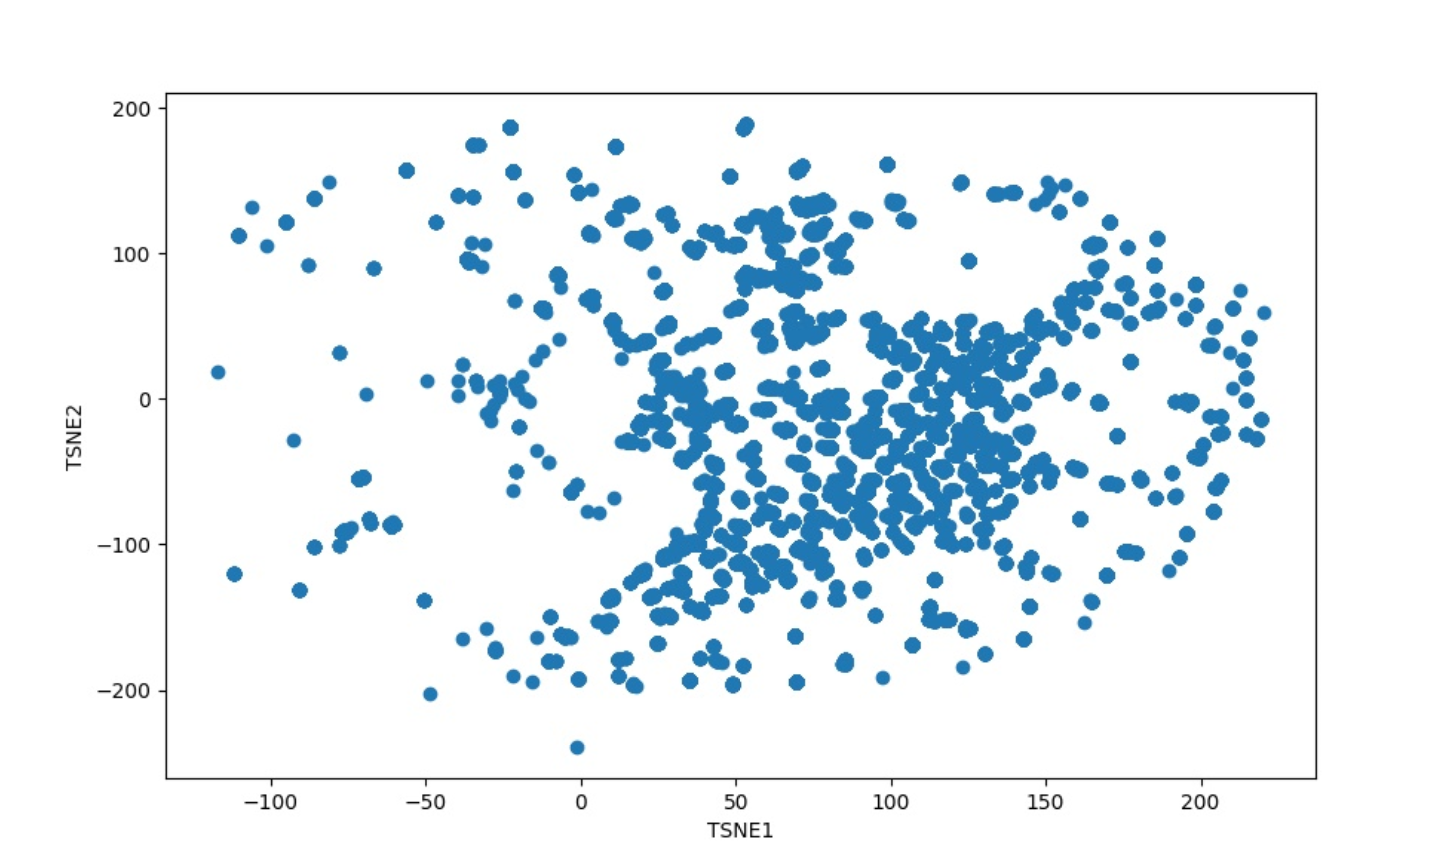

### PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Load dataset into a pandas DataFrame
df = pd.read_csv('Final Dataset.csv')

# Drop unnecessary columns
df.drop(columns=['collection_logical_name', 'collection_name', 'user', 'collections_events_type', 'machine_id', 'instance_index', 'alloc_collection_id', 'collection_type', 'collection_id', 'instance_events_type', 'Unnamed: 0.1'], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Dataset')
plt.grid(True)
plt.show()




![2 PCA a.png](<attachment:2 PCA a.png>)
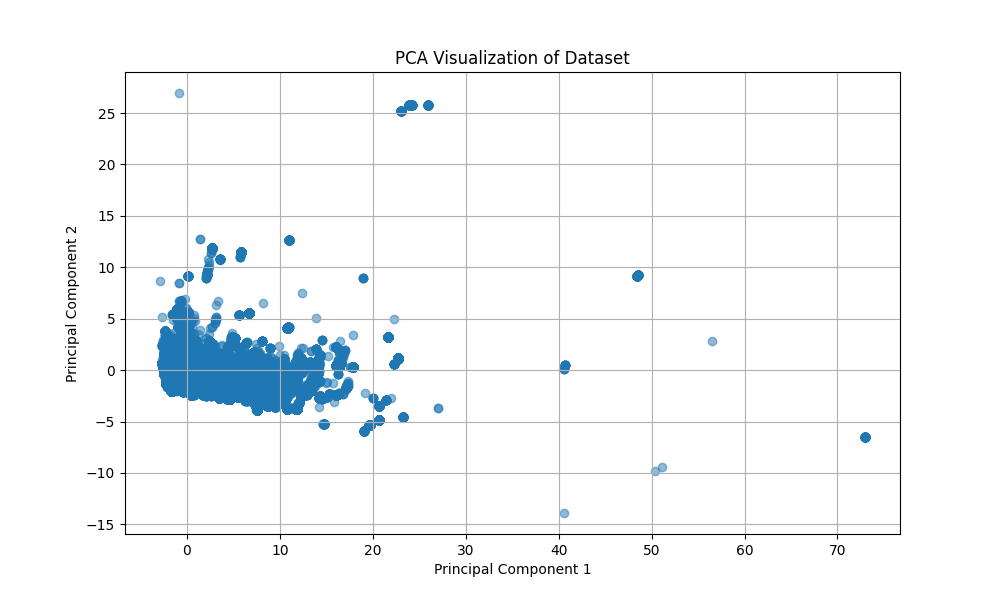

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset into a pandas DataFrame
df = pd.read_csv('Final Dataset.csv')

# Drop unnecessary columns
df.drop(columns=['collection_logical_name', 'collection_name', 'user', 'collections_events_type', 'machine_id', 'instance_index', 'alloc_collection_id', 'collection_type', 'collection_id', 'instance_events_type', 'Unnamed: 0.1'], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Plot the PCA results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization of Dataset')
plt.show()


![3 PCA a.png](<attachment:3 PCA a.png>)
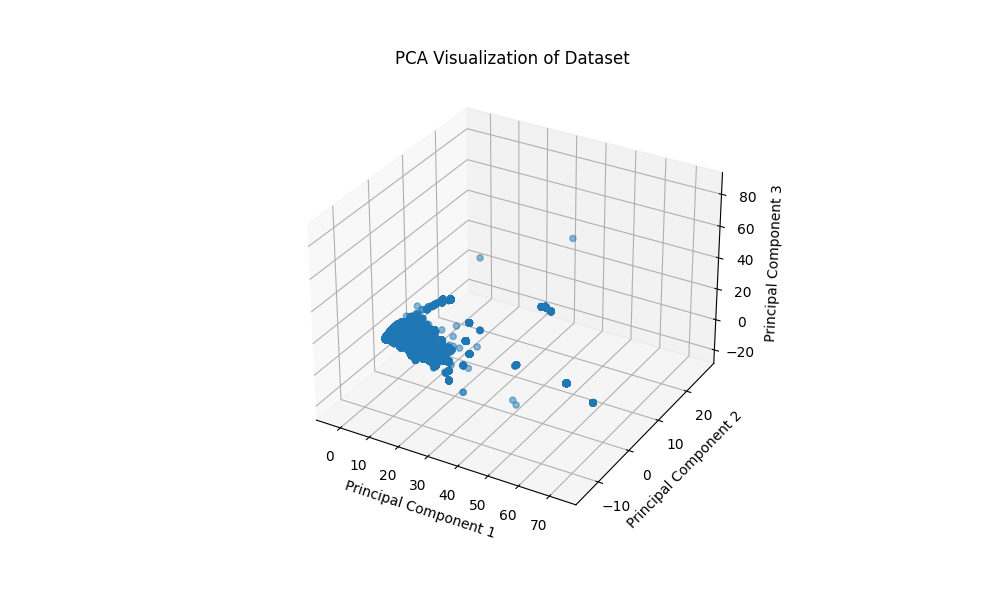

### ECDF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a pandas DataFrame
df = pd.read_csv('Final Dataset.csv')




# Define your numerical dataset
numerical_data = df.drop(columns=['collection_logical_name', 'collection_name', 
                                     'user', 'collections_events_type', 'machine_id', 
                                     'instance_index', 'alloc_collection_id', 
                                     'collection_type', 'collection_id', 
                                     'instance_events_type', 'Unnamed: 0.1'])

# Get the column names
columns = numerical_data.columns



# Melt the DataFrame to long format for easier plotting
melted_data = pd.melt(numerical_data)

# Plot ECDF using seaborn
sns.ecdfplot(data=melted_data, x='value', hue='variable', stat='proportion')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')

# Show plot
plt.grid(True)
plt.legend(loc='lower right')
plt.show()






![ECDF a.png](<attachment:ECDF a.png>)
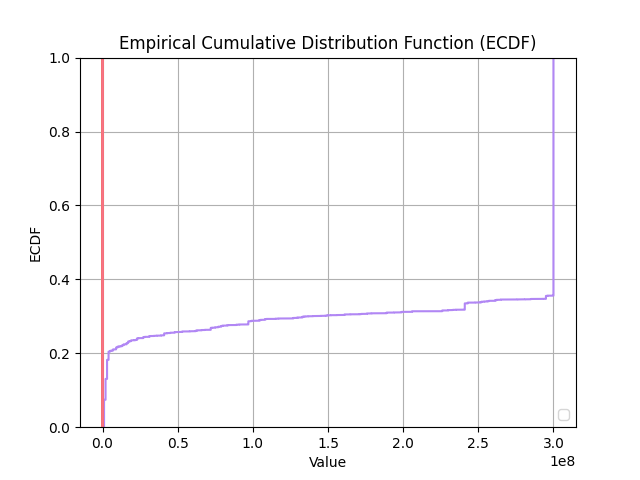

### Histogram

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
import skfuzzy as fuzz
import matplotlib.pyplot as plt


# Load dataset into a pandas DataFrame
df = pd.read_csv('Final Dataset.csv')



# Define your numerical dataset
numerical_data = df.drop(columns=['collection_logical_name', 'collection_name', 
                                     'user', 'collections_events_type', 'machine_id', 
                                     'instance_index', 'alloc_collection_id', 
                                     'collection_type', 'collection_id', 
                                     'instance_events_type', 'Unnamed: 0.1'])

# Get the column names
columns = numerical_data.columns

# Plot histograms for each feature
for column in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(numerical_data[column], bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()







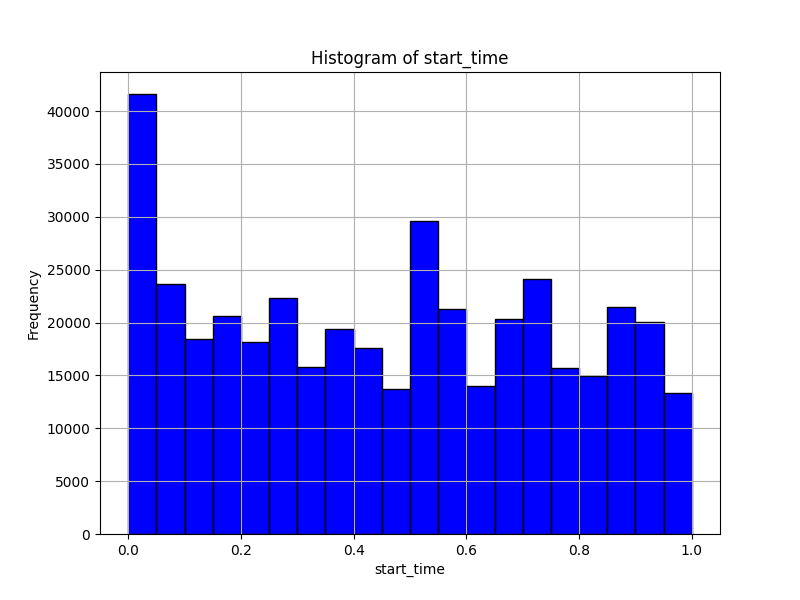 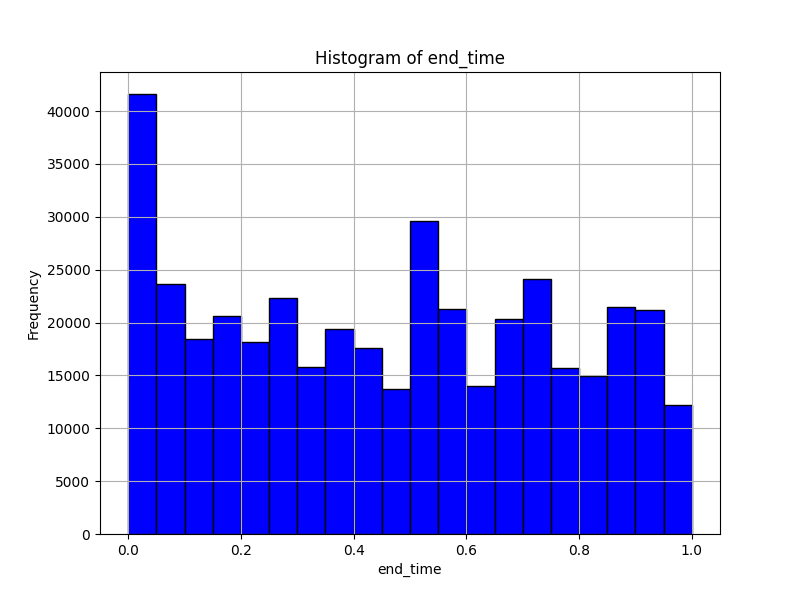